# **SyriaTel Customer Churn**


### Business Problem


## 1. Business Understanding



## 2. Data Understanding



## 3. Data Preparation

###  Import Necessary Modules

In [386]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Filtering future warnings
# import warnings
# warnings.filterwarnings('ignore')

###  a) Loading the Dataset

In [387]:
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

In [388]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [389]:
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [390]:
df.columns = df.columns.str.title().str.replace(' ', '_')
df.columns

Index(['State', 'Account_Length', 'Area_Code', 'Phone_Number',
       'International_Plan', 'Voice_Mail_Plan', 'Number_Vmail_Messages',
       'Total_Day_Minutes', 'Total_Day_Calls', 'Total_Day_Charge',
       'Total_Eve_Minutes', 'Total_Eve_Calls', 'Total_Eve_Charge',
       'Total_Night_Minutes', 'Total_Night_Calls', 'Total_Night_Charge',
       'Total_Intl_Minutes', 'Total_Intl_Calls', 'Total_Intl_Charge',
       'Customer_Service_Calls', 'Churn'],
      dtype='object')

In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account_Length          3333 non-null   int64  
 2   Area_Code               3333 non-null   int64  
 3   Phone_Number            3333 non-null   object 
 4   International_Plan      3333 non-null   object 
 5   Voice_Mail_Plan         3333 non-null   object 
 6   Number_Vmail_Messages   3333 non-null   int64  
 7   Total_Day_Minutes       3333 non-null   float64
 8   Total_Day_Calls         3333 non-null   int64  
 9   Total_Day_Charge        3333 non-null   float64
 10  Total_Eve_Minutes       3333 non-null   float64
 11  Total_Eve_Calls         3333 non-null   int64  
 12  Total_Eve_Charge        3333 non-null   float64
 13  Total_Night_Minutes     3333 non-null   float64
 14  Total_Night_Calls       3333 non-null   

In [392]:
df.shape

(3333, 21)

In [406]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Account_Length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area_Code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
Number_Vmail_Messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Total_Day_Minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Total_Day_Calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Total_Day_Charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Total_Eve_Minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Total_Eve_Calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Total_Eve_Charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Total_Night_Minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [407]:
df.dtypes

State                      object
Account_Length              int64
Area_Code                   int64
International_Plan         object
Voice_Mail_Plan            object
Number_Vmail_Messages       int64
Total_Day_Minutes         float64
Total_Day_Calls             int64
Total_Day_Charge          float64
Total_Eve_Minutes         float64
Total_Eve_Calls             int64
Total_Eve_Charge          float64
Total_Night_Minutes       float64
Total_Night_Calls           int64
Total_Night_Charge        float64
Total_Intl_Minutes        float64
Total_Intl_Calls            int64
Total_Intl_Charge         float64
Customer_Service_Calls      int64
Churn                        bool
dtype: object

### Data Cleaning

In [393]:
print(df['Phone_Number'].duplicated().any())

False


In [394]:
df.set_index('Phone_Number', inplace=True)

In [395]:
df.head()

,State,Account_Length,Area_Code,International_Plan,Voice_Mail_Plan,Number_Vmail_Messages,Total_Day_Minutes,Total_Day_Calls,Total_Day_Charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,Customer_Service_Calls,Churn
Phone_Number,,,,,,,,,,,,,,,,,,,,
382-4657,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
371-7191,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
358-1921,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
375-9999,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
330-6626,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [396]:
df.isna().sum()

State                     0
Account_Length            0
Area_Code                 0
International_Plan        0
Voice_Mail_Plan           0
Number_Vmail_Messages     0
Total_Day_Minutes         0
Total_Day_Calls           0
Total_Day_Charge          0
Total_Eve_Minutes         0
Total_Eve_Calls           0
Total_Eve_Charge          0
Total_Night_Minutes       0
Total_Night_Calls         0
Total_Night_Charge        0
Total_Intl_Minutes        0
Total_Intl_Calls          0
Total_Intl_Charge         0
Customer_Service_Calls    0
Churn                     0
dtype: int64

In [399]:
df.duplicated().sum()

0

In [400]:
df['International_Plan'].value_counts()

International_Plan
no     3010
yes     323
Name: count, dtype: int64

In [401]:
df['Voice_Mail_Plan'].value_counts()

Voice_Mail_Plan
no     2411
yes     922
Name: count, dtype: int64

In [402]:
df['Churn'].value_counts()

Churn
False    2850
True      483
Name: count, dtype: int64

## Exploratory Data Analysis

### Churn Distribution Visualization

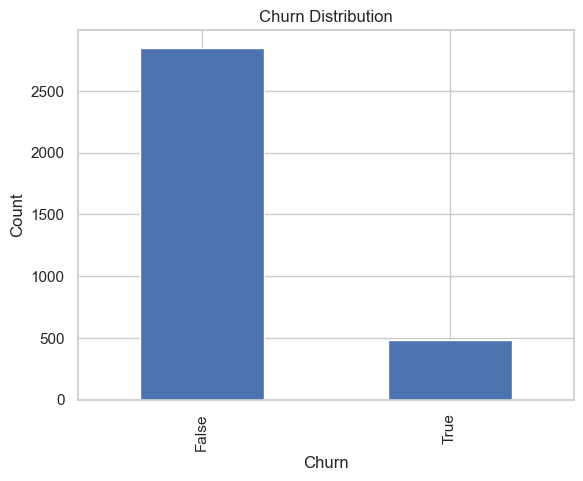

In [403]:
df['Churn'].value_counts().plot(kind='bar')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution')
plt.show()

#### From the visualization, we can interpret that:

There are 2850 instances of non-churned customers (represented by "False"). and 483 instances of churned customers (represented by "True").
This indicates that there is a class imbalance, with significantly more non-churned instances compared to churned instances. Identifying this class imbalance is crucial for developing predictive models or strategies to address churn effectively. Additionally, it highlights the importance of focusing efforts on retaining customers to reduce the churn rate.

## Analysing Continuous Features

Analyzing continuous variables provides valuable insights into the structure and characteristics of the data, guiding data preprocessing, feature engineering, and modeling decisions to ensure robust and interpretable analyses.

In [404]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
print(numeric_columns.columns.tolist())

['Account_Length', 'Area_Code', 'Number_Vmail_Messages', 'Total_Day_Minutes', 'Total_Day_Calls', 'Total_Day_Charge', 'Total_Eve_Minutes', 'Total_Eve_Calls', 'Total_Eve_Charge', 'Total_Night_Minutes', 'Total_Night_Calls', 'Total_Night_Charge', 'Total_Intl_Minutes', 'Total_Intl_Calls', 'Total_Intl_Charge', 'Customer_Service_Calls']


In [405]:
df[['Account_Length', 'Number_Vmail_Messages', 'Total day calls', 
    'total eve calls', 'total night calls', 'total intl calls',
    'customer service calls']].hist(figsize=(15, 10))
plt.show()


KeyError: "['Total day calls', 'total eve calls', 'total night calls', 'total intl calls', 'customer service calls'] not in index"

In [ ]:
df_pairplot = df[['account length', 'number vmail messages', 'total day calls', 'total eve calls', 'total night calls', 'total intl calls', 'customer service calls', 'churn']]
sns.pairplot(df_pairplot, hue="churn", height=2.5)
plt.show()


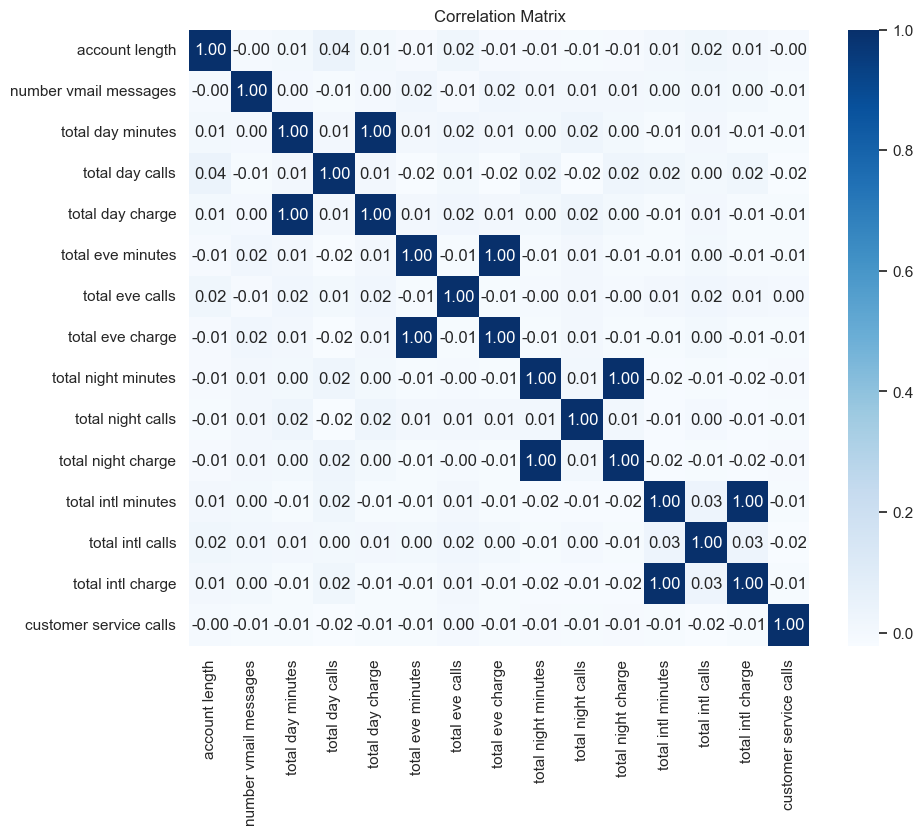

In [ ]:
correlation_matrix = df[Continuous_columns].corr()
# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Analysing Categorical Features

In [ ]:
Categorical_cols = ['state', 'area code', 'international plan', 'voice mail plan']

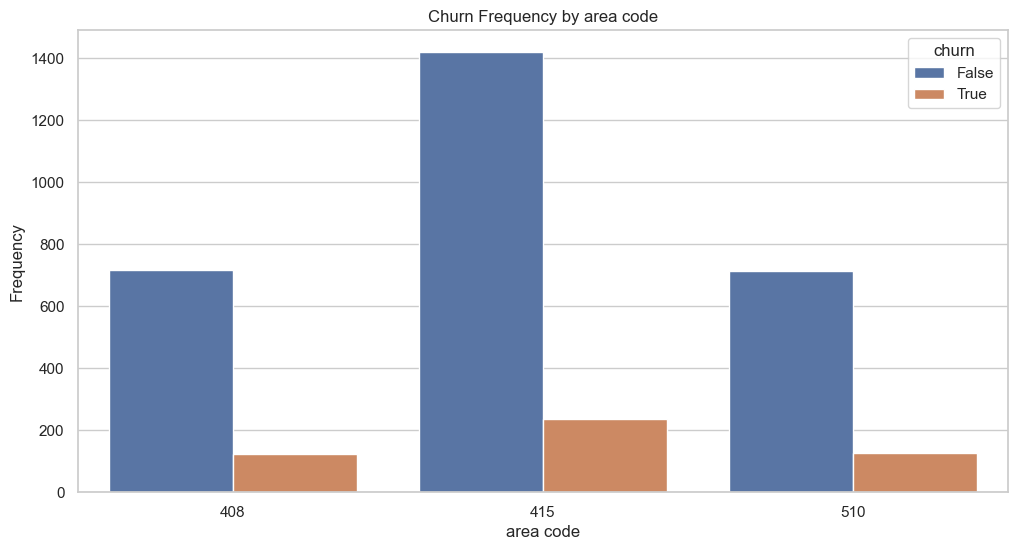

In [ ]:

# Frequency distribution of 'state'
plt.figure(figsize=(12, 6))
sns.countplot(df, x='area code', hue='churn')
plt.title('Churn Frequency by area code')
plt.xlabel('area code')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Churn rate by 'area code'
churn_rate_area_code = df.groupby('area code')['churn'].mean()
print(churn_rate_area_code)


area code
408    0.145585
415    0.142598
510    0.148810
Name: churn, dtype: float64


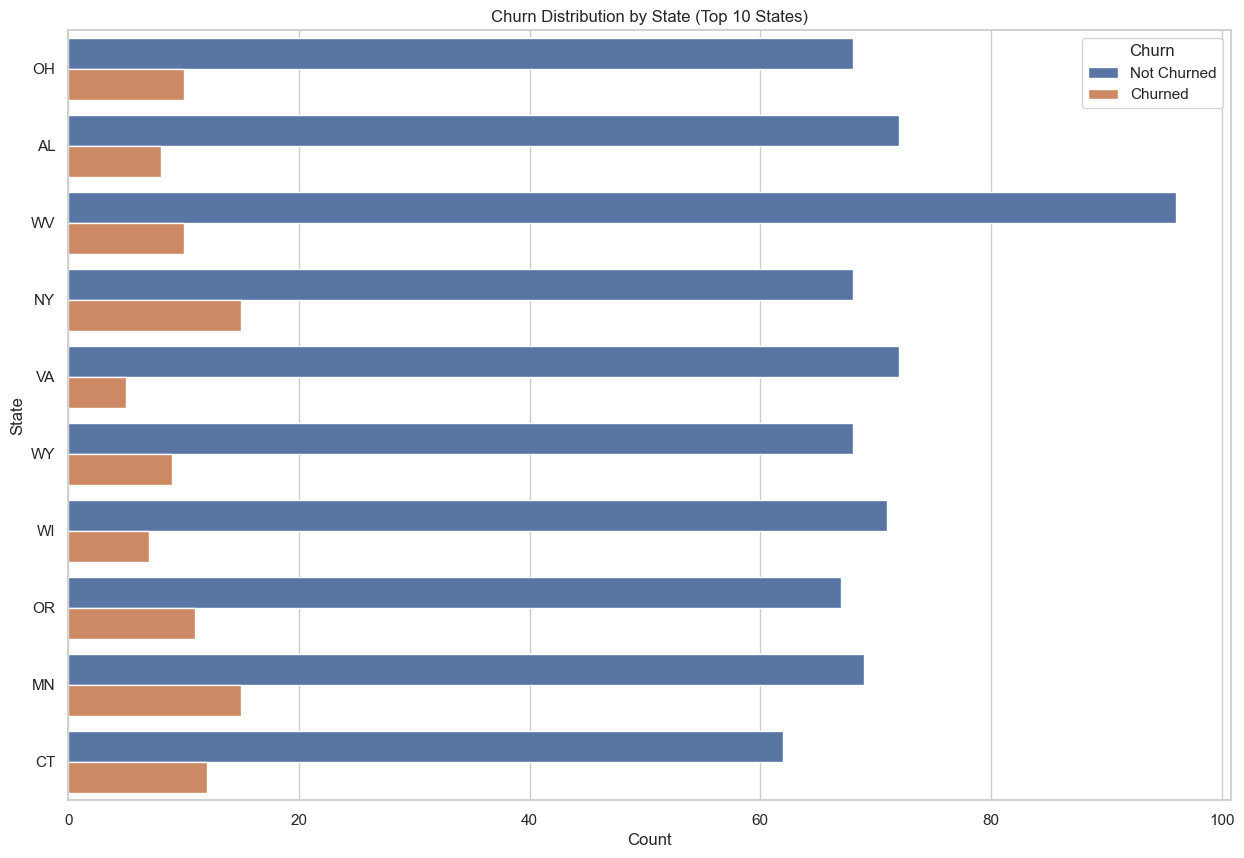

In [ ]:
# Get the top 10 states with the highest counts
top_states = df['state'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 states
df_top_states = df[df['state'].isin(top_states)]

# Plot the count plot with the filtered DataFrame
plt.figure(figsize=(15, 10))
sns.countplot(data=df_top_states, y='state', hue='churn')
plt.title('Churn Distribution by State (Top 10 States)')
plt.xlabel('Count')
plt.ylabel('State')
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()




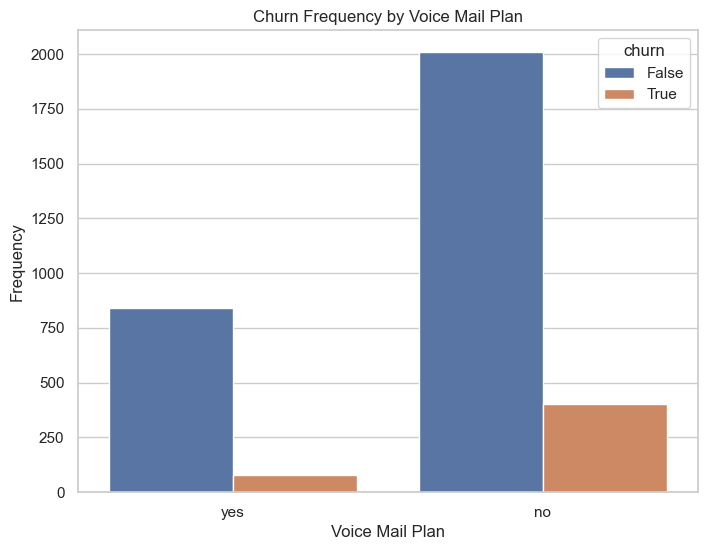

In [ ]:
# Stacked bar plot for 'voice mail plan' and 'churn'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='voice mail plan', hue='churn')
plt.title('Churn Frequency by Voice Mail Plan')
plt.xlabel('Voice Mail Plan')
plt.ylabel('Frequency')
plt.show()



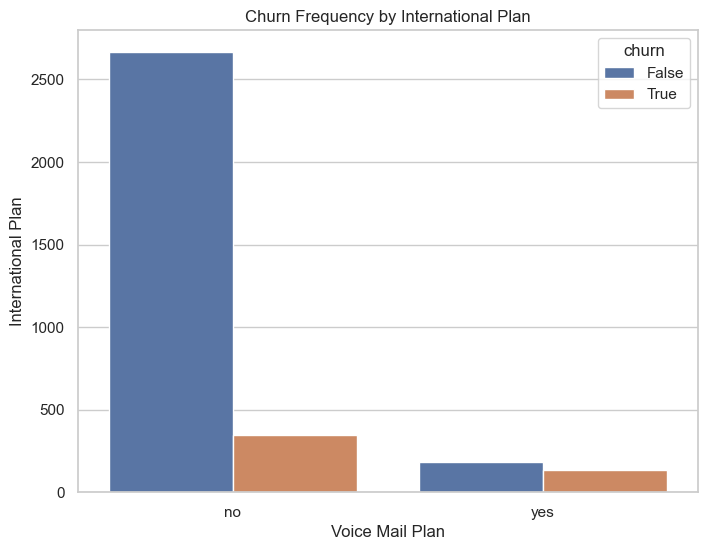

In [ ]:
# Stacked bar plot for 'international plan' and 'churn'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='international plan', hue='churn')
plt.title('Churn Frequency by International Plan')
plt.xlabel('Voice Mail Plan')
plt.ylabel('International Plan')
plt.show()

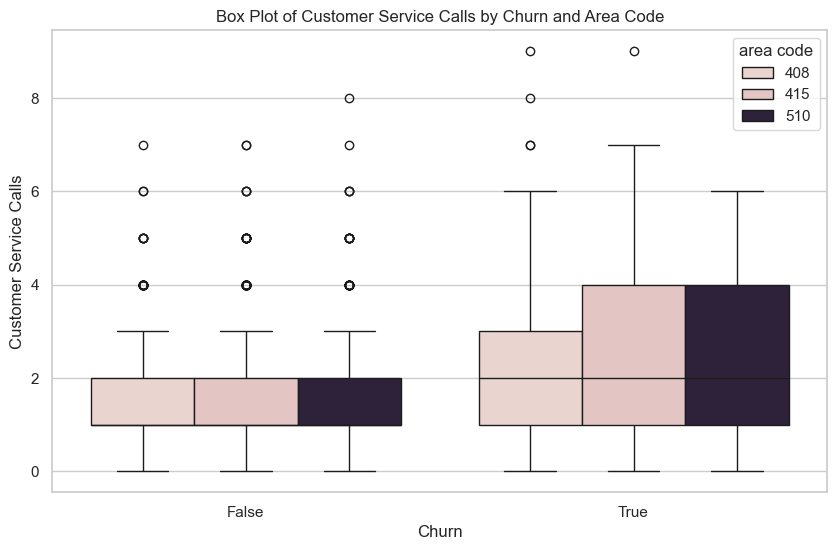

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='churn', y='customer service calls', hue='area code')
plt.title('Box Plot of Customer Service Calls by Churn and Area Code')
plt.xlabel('Churn')
plt.ylabel('Customer Service Calls')
plt.show()